# Monte Carlo Option payoff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import scipy.stats as st

In [3]:
# Define given parameters
K = 50  # Strike price
S0 = 49.6  # Spot price
annual_return = 0.07  # 7% annual return
annual_volatility = 0.40  # 20% annual volatility
current_date = datetime(2024, 1, 20)
maturity_date = datetime(2024, 4, 15)

In [4]:
# Calculate time to maturity in years
T = (maturity_date - current_date).days / 365
T

0.2356164383561644

In [5]:
# Compute return and volatility
expected_return = (1+annual_return)**T - 1
sigma = annual_volatility * np.sqrt(T)

In [6]:
print(f"Time to Maturity (Years): {T:.4f}")
print(f"Expected Return: {expected_return:.2%}")
print(f"Volatility: {sigma:.2%}")

Time to Maturity (Years): 0.2356
Expected Return: 1.61%
Volatility: 19.42%


In [7]:

# Generate 1000 simulations of returns
simulated_returns = np.random.normal(loc=expected_return, scale=sigma, size=1000)

In [8]:
# Compute simulated prices
simulated_prices = S0 * (1 + simulated_returns)

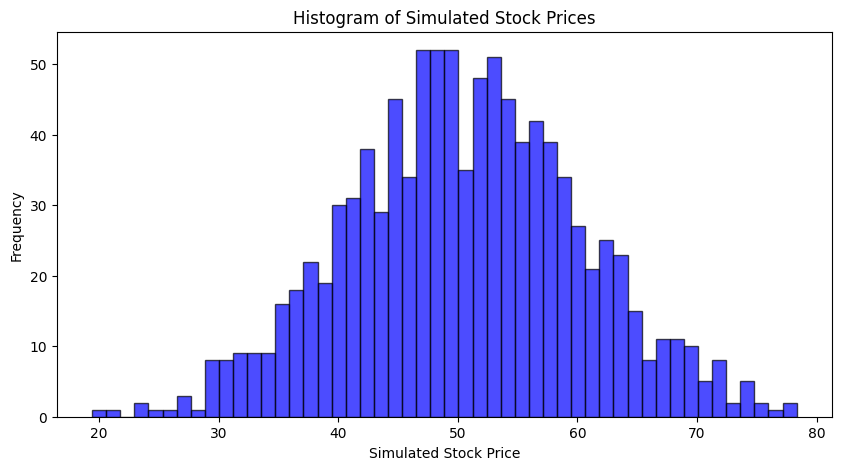

In [9]:
# Plot histogram of simulated prices
plt.figure(figsize=(10, 5))
plt.hist(simulated_prices, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("Simulated Stock Price")
plt.ylabel("Frequency")
plt.title("Histogram of Simulated Stock Prices")
plt.show()

In [10]:
def calculate_long_call_payoff(simulated_prices, K):
    # Payoff for a long call option: max(S - K, 0)
    payoffs = np.maximum(simulated_prices - K, 0)
    return payoffs
# Calculate long call option payoff
payoffs = calculate_long_call_payoff(simulated_prices, K)

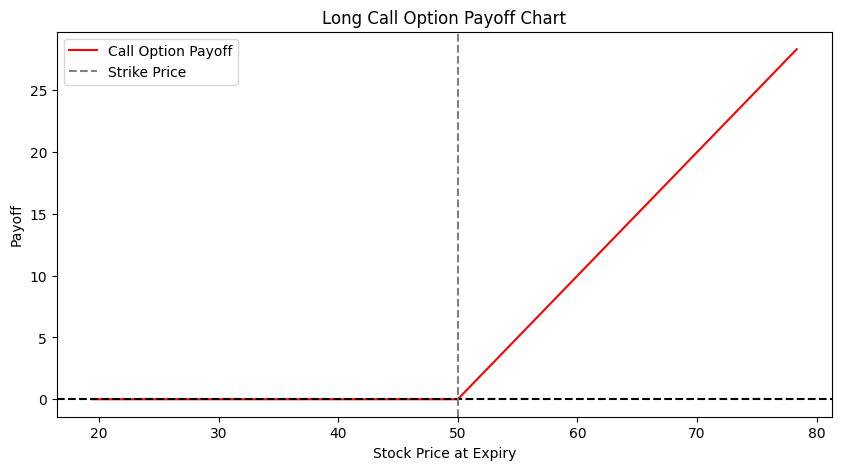

In [11]:
# Plot payoff chart as a line graph
plt.figure(figsize=(10, 5))
sorted_prices = np.sort(simulated_prices)
sorted_payoffs = np.maximum(sorted_prices - K, 0)
plt.plot(sorted_prices, sorted_payoffs, label='Call Option Payoff', color='red')
plt.axhline(0, color='black', linestyle='--')  # Zero profit/loss line
plt.axvline(K, color='gray', linestyle='--', label='Strike Price')
plt.xlabel("Stock Price at Expiry")
plt.ylabel("Payoff")
plt.title("Long Call Option Payoff Chart")
plt.legend()
plt.show()

# Black Scholes Model

In [6]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [7]:
def black_scholes_call(S, K, T, r, sigma):
    """
    S: Current stock price
    K: Strike price
    T: Time to expiration (in years)
    r: Risk-free interest rate (as decimal)
    sigma: Volatility (as decimal)"
    """

    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price

In [8]:
def put_from_call(call_price, S, K, T, r):
    put_price = call_price + K * math.exp(-r * T) - S
    return put_price

In [9]:
# Example usage
S = 110  # Current stock price
K = 100  # Strike price
T = 30/365    # Time to maturity (1 year)
r = 0.07  # Risk-free interest rate (5%)
sigma = 0.2  # Volatility (20%)

In [10]:
call_price = black_scholes_call(S, K, T, r, sigma)
put_price = put_from_call(call_price, S, K, T, r)

In [11]:
print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

Call Option Price: 10.67
Put Option Price: 0.09


In [12]:
# Payoff diagrams at maturity
K = 100  # Strike price
stock_prices = np.linspace(50, 150, 100)

# Long Call Payoff
long_call_payoff = np.maximum(stock_prices - K, 0)
short_put_payoff = -np.maximum(K - stock_prices, 0)


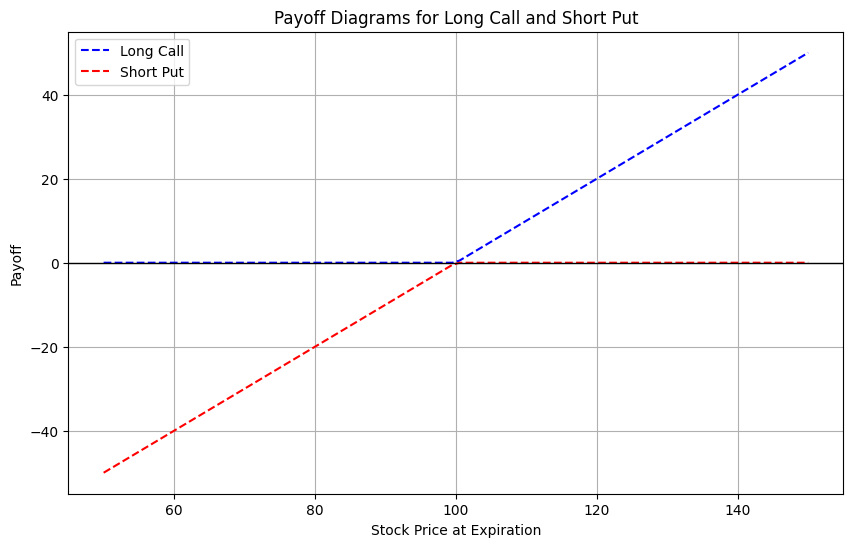

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(stock_prices, long_call_payoff, label='Long Call', linestyle='--', color='b')
plt.plot(stock_prices, short_put_payoff, label='Short Put', linestyle='--', color='r')
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.title('Payoff Diagrams for Long Call and Short Put')
plt.legend()
plt.grid()
plt.show()